In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy.stats import norm
from scipy.stats import chi2
from scipy.optimize import fmin_l_bfgs_b as minimizer
from scipy.special import gammaln

In [28]:
Aargs = {'loc': 0,
         'scale': 2}

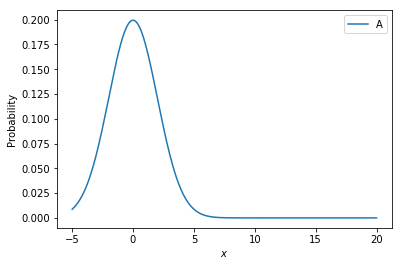

In [29]:
xspace = np.linspace(-5, 20, 1000)
fig = plt.figure()
plt.plot(xspace, norm.pdf(xspace, **Aargs), label='A')

plt.xlabel(r'$x$')
plt.ylabel(r'Probability')
plt.legend()
plt.show()

Above creates the "True" probability ditribution of the data that I am going to draw from and use.

In [30]:
# Now pull random data from the distribution
N_A = 500
data = norm.rvs(size=N_A, **Aargs)

In [31]:
print(data)

[-1.27887847  0.24581135 -3.17609197 -0.45429974 -2.35330964  1.88193266
  0.85549715  0.64210724  1.12960507  1.47809911 -0.07001872 -3.78089418
  0.10352805 -0.433015   -1.00163217 -3.83082894 -0.90141027  1.54558315
 -1.67763033  4.02394291  4.69704629 -0.29721264  0.76252785 -2.91258228
  0.76524931 -0.84875705  2.57631413 -2.10172547  3.32163042  1.71181671
  0.36956129  3.26060183  1.4647686  -0.25956659 -0.15962085  2.12516152
 -0.72481272  2.25002064  1.50178578 -1.28246482 -0.17087278  1.50529516
  2.87957101  0.53172211  1.47719323 -0.30264206  0.08999075 -0.70014605
 -0.9212334  -0.06376711  1.55212105 -0.45784353  2.75847239 -1.3966231
  2.82077617 -0.06902438  5.5142462   0.21353499  1.92126026 -2.30690137
  1.76748947  1.92470092  2.03050111  1.76976947  0.62499508  1.60033683
  1.68090216 -0.80621915 -3.8836217   0.4106135   2.06826861 -0.49786294
  1.97286037 -3.15834753 -1.30536582 -1.12203545  5.02062925  2.57269099
  0.27831293  1.59436818 -2.51578798 -1.67885291  0.

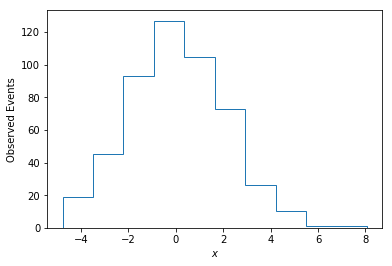

In [32]:
# Plots the randomly generated data based off the PDF

fig = plt.figure()
plt.hist(data, histtype='step')

plt.xlabel(r'$x$')
plt.ylabel(r'Observed Events')
plt.show()

Now using a second PDF to smear out the data points, to simulate the detector's inefficiencies. Once that is done, we can try the unfolding and folding methods on the smeared data to see if we can reconstruct the above dataset, the "True" data. This data is sorta? like the Monte Carlo data for FACT.

In [33]:
SmeardArg = {'loc':2,
             'scale': 5}

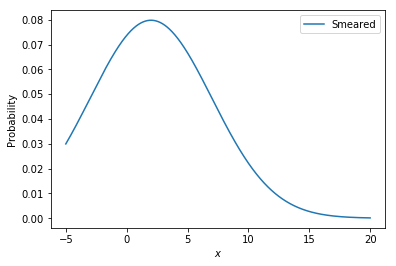

In [34]:
fig = plt.figure()
plt.plot(xspace, norm.pdf(xspace, **SmeardArg), label='Smeared')
plt.xlabel(r'$x$')
plt.ylabel(r'Probability')
plt.legend()
plt.show()

In [35]:
# Get the same amount of data points as in the True distribution
# So that the "error" can be added one by one
error = norm.rvs(size=N_A, **SmeardArg)

In [37]:
measured_distribution = data + error
print(len(measured_distribution))

500
